# Main


In [1]:
import random
import re
import feather
import os
import matplotlib.pyplot as plt
import subprocess
from Bio.Phylo.PhyloXML import Phylogeny
from Bio import Phylo
import networkx, pylab
from tqdm import tqdm
import math
#import mantel

In [2]:

import h5py
import numpy as np
import pandas as pd
from scipy.sparse import csc_matrix

def read_mapdb_h5(h5_path, otu_data=True, meta_data=True):
    """Example file: /mnt/mnemo3/janko/data/microbe_atlas/sruns-otus.97.otutable_plusMetaNoHeader_taxonomy_unmapped.h5"""
    f = h5py.File(h5_path, 'r')
    result_dict = {}

    # read otu data
    if otu_data:
        data_handle = f["otu_table"]
        col_ptr, nzvals, rowindices, otu_index, sample_index = [np.array(data_handle[sub_key]) for sub_key in ['data_colptr', 'data_nzval', 'data_rowval', 'oids', 'sids']]

        ## correct indexing (julia starts at 1)
        col_ptr -= 1
        rowindices -= 1

        otutable_sparse = csc_matrix((nzvals,rowindices,col_ptr), shape=(data_handle["m"][()],data_handle["n"][()]))
        result_dict["otu_data"] = {"otu_table": otutable_sparse, "otu_index": otu_index, "sample_index": sample_index}

    # read meta data
    if meta_data:
        meta_handle = f["meta_data"]
        result_dict["meta_data"] = {sub_key: pd.DataFrame(np.array(meta_handle[sub_key]).T) for sub_key in meta_handle.keys()}

    f.close()

    return result_dict



## Select Phyla, Families etc.

In [27]:
savepath="/mnt/mnemo6/lukas/Python/community_conservatism/General/fulltax2/"

In [28]:
taxname="Bacteria"


In [168]:
#taxname="Bacteroidetes"

In [5]:
#select OTU level here: in This case 99%
f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.2/metag_minfilter/samples-otus.99.metag.minfilter.remap.h5")


#version without multicellular organisms, and min reads+coverage

#f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.2/metag_minfilter/samples-otus.99.metag.minfilter.remap.minCov90.noMulticell.h5")

tax=f1["meta_data"]["taxonomy"]

In [6]:
tax[~tax[2].str.split(";",expand=True)[6].isna()]

0                                               1  \
1         B99_7947       B16S;90_237;96_804;97_934;98_1089;99_7947   
22        B99_7789     B16S;90_707;96_2135;97_2552;98_3123;99_7789   
33        B99_9180     B16S;90_428;96_1410;97_5308;98_6738;99_9180   
39        B99_3729     B16S;90_110;96_1960;97_2336;98_2860;99_3729   
57       B99_93895   B16S;90_146;96_3231;97_4062;98_67029;99_93895   
...            ...                                             ...   
218380  B99_216389   B16S;90_966;96_2694;97_3252;98_4022;99_216389   
218384   B99_65116   B16S;90_1446;96_4296;97_6379;98_7990;99_65116   
218385   B99_67143  B16S;90_1446;96_4296;97_5227;98_20888;99_67143   
218386   B99_46166  B16S;90_1446;96_4296;97_5227;98_20888;99_46166   
218387   B99_94408  B16S;90_26796;96_3530;97_4296;98_5399;99_94408   

                                                        2   3  \
1       Bacteria;Actinobacteria;Actinobacteria;Propion...  27   
22      Bacteria;Actinobacteria;Thermoleophilia;Soliru...   1   
33      Bacteria;Acidobacteria;Acidobacteriia;Acidobac...   6   
39      Bacteria;Proteobacteria;Alphaproteobacteria;Ca...   3   
57      Bacteria;Actinobacteria;Actinobacteria;Frankia...   7   
...                                                   ...  ..   
218380  Bacteria;Proteobacteria;Alphaproteobacteria;Rh...   1   
218384  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   4   
218385  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   2   
218386  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   8   
218387  Bacteria;Aquificae;Aquificae;Aquificales;Aquif...   1   

                                      4  \
1                                         
22                                        
33                            NC_014963   
39      NZ_AWGB01000110,NZ_AQWM01000073   
57                                        
...                                 ...   
218380                                    
218384                                    
218385                                    
218386                                    
218387                                    

                                                        5                   6  \
1                                                          0.9813153743743896   
22                                                         0.9651055932044983   
33                Terriglobus saanensis SP1PR4(NC_014963)                 1.0   
39      Asticcacaulis benevestitus DSM 16100 (NZ_AWGB0...                 1.0   
57                                                          0.969065248966217   
...                                                   ...                 ...   
218380                                                     0.9794180393218994   
218384                                                     0.9664842486381531   
218385                                                     0.9641649723052979   
218386                                                     0.9615125060081482   
218387                                                     0.9893190860748291   

           7                                                  8  \
1       1283  Bacteria;Actinobacteria;Actinobacteria;Propion...   
22      1013  Bacteria;Actinobacteria;Thermoleophilia;Soliru...   
33      1498  Bacteria;Acidobacteria;Acidobacteriia;Acidobac...   
39      1464  Bacteria;Proteobacteria;Alphaproteobacteria;Ca...   
57      1380  Bacteria;Actinobacteria;Actinobacteria;Frankia...   
...      ...                                                ...   
218380  1326  Bacteria;Proteobacteria;Alphaproteobacteria;Rh...   
218384  1359  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   
218385  1359  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   
218386  1338  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   
218387  1461  Bacteria;Aquificae;Aquificae;Aquificales;Aquif...   

                                       9                              10  \
1                       

In [7]:
taxes_full=tax[~tax[2].str.split(";",expand=True)[6].isna()]

tax=taxes_full

tax=tax.reset_index(drop=True)

In [8]:
tax

0                                               1  \
0        B99_7947       B16S;90_237;96_804;97_934;98_1089;99_7947   
1        B99_7789     B16S;90_707;96_2135;97_2552;98_3123;99_7789   
2        B99_9180     B16S;90_428;96_1410;97_5308;98_6738;99_9180   
3        B99_3729     B16S;90_110;96_1960;97_2336;98_2860;99_3729   
4       B99_93895   B16S;90_146;96_3231;97_4062;98_67029;99_93895   
...           ...                                             ...   
20402  B99_216389   B16S;90_966;96_2694;97_3252;98_4022;99_216389   
20403   B99_65116   B16S;90_1446;96_4296;97_6379;98_7990;99_65116   
20404   B99_67143  B16S;90_1446;96_4296;97_5227;98_20888;99_67143   
20405   B99_46166  B16S;90_1446;96_4296;97_5227;98_20888;99_46166   
20406   B99_94408  B16S;90_26796;96_3530;97_4296;98_5399;99_94408   

                                                       2   3  \
0      Bacteria;Actinobacteria;Actinobacteria;Propion...  27   
1      Bacteria;Actinobacteria;Thermoleophilia;Soliru...   1   
2      Bacteria;Acidobacteria;Acidobacteriia;Acidobac...   6   
3      Bacteria;Proteobacteria;Alphaproteobacteria;Ca...   3   
4      Bacteria;Actinobacteria;Actinobacteria;Frankia...   7   
...                                                  ...  ..   
20402  Bacteria;Proteobacteria;Alphaproteobacteria;Rh...   1   
20403  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   4   
20404  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   2   
20405  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   8   
20406  Bacteria;Aquificae;Aquificae;Aquificales;Aquif...   1   

                                     4  \
0                                        
1                                        
2                            NC_014963   
3      NZ_AWGB01000110,NZ_AQWM01000073   
4                                        
...                                ...   
20402                                    
20403                                    
20404                                    
20405                                    
20406                                    

                                                       5                   6  \
0                                                         0.9813153743743896   
1                                                         0.9651055932044983   
2                Terriglobus saanensis SP1PR4(NC_014963)                 1.0   
3      Asticcacaulis benevestitus DSM 16100 (NZ_AWGB0...                 1.0   
4                                                          0.969065248966217   
...                                                  ...                 ...   
20402                                                     0.9794180393218994   
20403                                                     0.9664842486381531   
20404                                                     0.9641649723052979   
20405                                                     0.9615125060081482   
20406                                                     0.9893190860748291   

          7                                                  8  \
0      1283  Bacteria;Actinobacteria;Actinobacteria;Propion...   
1      1013  Bacteria;Actinobacteria;Thermoleophilia;Soliru...   
2      1498  Bacteria;Acidobacteria;Acidobacteriia;Acidobac...   
3      1464  Bacteria;Proteobacteria;Alphaproteobacteria;Ca...   
4      1380  Bacteria;Actinobacteria;Actinobacteria;Frankia...   
...     ...                                                ...   
20402  1326  Bacteria;Proteobacteria;Alphaproteobacteria;Rh...   
20403  1359  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   
20404  1359  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   
20405  1338  Bacteria;Bacteroidetes;;Bacteroidetes Order II...   
20406  1461  Bacteria;Aquificae;Aquificae;Aquificales;Aquif...   

                                      9                              10  \
0                      JF138547:1..1339    NZ_LT629757:1195946..1197473   
1      NZ

In [ ]:
#Exclude Chloroplasts here
#l=tax[tax[2].str.contains(taxname)]

#l[l[1].str.contains("E")]

#otu_ind=l[l[1].str.contains("E")].index

In [9]:
otu_ind=tax[tax[2].str.contains(taxname)].index

In [10]:
#Reformat to get them in the same format as in the tree distances file
otus=tax.loc[otu_ind][1].str.replace(";","_")

In [11]:
ot=otus.values

In [12]:
#all bacteria, then only save the ones with full taxonomy
f=pd.read_feather("/mnt/mnemo6/lukas/Python/evo_treedists/General/"+taxname+"/"+taxname+"_distances_99OTU.feather", use_threads=True)

In [13]:
headers=f.columns

In [14]:
dset = f


In [15]:
head=headers

In [16]:
temp = set(ot)
res = [i for i, val in enumerate(head) if val in temp]

In [18]:
len(res)

14634

In [17]:
df_mp=pd.DataFrame()

In [19]:
u=[]
for num, val in enumerate(res):
    n1=dset.iloc[:,val]
    #df1 = pd.DataFrame(data=n1)
    u.append(n1)

len(u)

len(u[1])

for i in range(len(u)):
    u[i]=u[i][res]

df_mp=pd.DataFrame(u)

df_mp.index=head[res]

df_mp.columns=head[res]

In [20]:
def makedirs(taxnam):
    inp_1="mkdir "+savepath+taxname
    subprocess.run(inp_1,shell=True)
    inp_2="mkdir "+savepath+taxname+"/plots"
    subprocess.run(inp_2,shell=True)
    inp_3="mkdir "+savepath+taxname+"/tree"
    subprocess.run(inp_3,shell=True)
      

In [21]:
makedirs("Bacteria")

In [ ]:
"""for i in res:
    n1=dset[i,res]
    #df1 = pd.DataFrame(data=n1)
    df_mp[head[i]]=n1

df_mp.index=head[res]
#df_mp.columns=head[res]
"""

In [ ]:
#df_mp=df_mp.iloc[1:]

In [23]:
df_mp

B16S_90_3_96_3_97_3_98_14126_99_18594  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                            0.00000   
B16S_90_3_96_3_97_3_98_3_99_5502                                                 0.01590   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                                0.08822   
B16S_90_3_96_378_97_418_98_477_99_3091                                           0.01913   
B16S_90_3_96_3_97_3_98_3_99_369                                                  0.02012   
...                                                                                  ...   
B16S_90_3_96_23516_97_28907_98_36342_99_49085                                    0.05916   
B16S_90_3_96_3_97_46086_98_59081_99_82126                                        0.05890   
B16S_90_3_96_3454_97_4207_98_5276_99_7089                                        0.02972   
B16S_90_3_96_76602_97_97579_98_129196_99_189521                                  0.06445   
B16S_90_3_96_3_97_71462_98_93362_99_133870                                       0.04011   

                                                   B16S_90_3_96_3_97_3_98_3_99_5502  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                       0.01590   
B16S_90_3_96_3_97_3_98_3_99_5502                                            0.00000   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                           0.07796   
B16S_90_3_96_378_97_418_98_477_99_3091                                      0.00887   
B16S_90_3_96_3_97_3_98_3_99_369                                             0.00986   
...                                                                             ...   
B16S_90_3_96_23516_97_28907_98_36342_99_49085                               0.04890   
B16S_90_3_96_3_97_46086_98_59081_99_82126                                   0.04864   
B16S_90_3_96_3454_97_4207_98_5276_99_7089                                   0.01946   
B16S_90_3_96_76602_97_97579_98_129196_99_189521                             0.05419   
B16S_90_3_96_3_97_71462_98_93362_99_133870                                  0.02985   

                                                   B16S_90_26505_96_38780_97_48483_98_62323_99_86937  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                                        0.08822   
B16S_90_3_96_3_97_3_98_3_99_5502                                                             0.07796   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                                            0.00000   
B16S_90_3_96_378_97_418_98_477_99_3091                                                       0.07183   
B16S_90_3_96_3_97_3_98_3_99_369                                                              0.07282   
...                                                                                              ...   
B16S_90_3_96_23516_97_28907_98_36342_99_49085                                                0.11768   
B16S_90_3_96_3_97_46086_98_59081_99_82126                                                    0.11742   
B16S_90_3_96_3454_97_4207_98_5276_99_7089                                                    0.08824   
B16S_90_3_96_76602_97_97579_98_129196_99_189521                                              0.12297   
B16S_90_3_96_3_97_71462_98_93362_99_133870                                                   0.09863   

                                                   B16S_90_3_96_378_97_418_98_477_99_3091  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                             0.01913   
B16S_90_3_96_3_97_3_98_3_99_5502                                                  0.00887   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                                 0.07183   
B16S_90_3_96_378_97_418_98_477_99_3091                                            0.00000   
B16S_90_3_96_3_97_3_98_3_99_369                                                   0.00307   
...                                                                                   ...   
B

In [22]:
#Feather dataformat: Quicker, lighter to save this big matrix

feather.write_dataframe(df_mp, savepath+taxname+"/"+taxname+"_distances_99OTU.feather")

In [24]:
otutable=f1["otu_data"]["otu_table"]

In [25]:
taxname="Bacteria"

In [ ]:
#the following two ways to select otu pairs are potentially interchangable

tax2=tax[tax[0].str.contains("B")]
otu_ind=tax2[tax2[2].str.contains(taxname)].index

#Reformat to get them in the same format as in the tree distances file
otus=tax2.loc[otu_ind][1].str.replace(";","_")

ot=otus.values



In [48]:
df_mp

B16S_90_3_96_3_97_3_98_14126_99_18594  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                            0.00000   
B16S_90_3_96_3_97_3_98_3_99_5502                                                 0.01590   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                                0.08822   
B16S_90_3_96_84421_97_107786_98_143321_99_211331                                 0.08214   
B16S_90_3_96_77625_97_98975_98_131224_99_192782                                  0.07664   
...                                                                                  ...   
B16S_90_3_96_3454_97_4207_98_5276_99_7089                                        0.02972   
B16S_90_3_96_56784_97_71734_98_93755_99_134499                                   0.06829   
B16S_90_3_96_76602_97_97579_98_129196_99_189521                                  0.06445   
B16S_90_3_96_76834_97_97907_98_129678_99_190319                                  0.06913   
B16S_90_3_96_3_97_71462_98_93362_99_133870                                       0.04011   

                                                   B16S_90_3_96_3_97_3_98_3_99_5502  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                       0.01590   
B16S_90_3_96_3_97_3_98_3_99_5502                                            0.00000   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                           0.07796   
B16S_90_3_96_84421_97_107786_98_143321_99_211331                            0.07188   
B16S_90_3_96_77625_97_98975_98_131224_99_192782                             0.06638   
...                                                                             ...   
B16S_90_3_96_3454_97_4207_98_5276_99_7089                                   0.01946   
B16S_90_3_96_56784_97_71734_98_93755_99_134499                              0.05803   
B16S_90_3_96_76602_97_97579_98_129196_99_189521                             0.05419   
B16S_90_3_96_76834_97_97907_98_129678_99_190319                             0.05887   
B16S_90_3_96_3_97_71462_98_93362_99_133870                                  0.02985   

                                                   B16S_90_26505_96_38780_97_48483_98_62323_99_86937  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                                        0.08822   
B16S_90_3_96_3_97_3_98_3_99_5502                                                             0.07796   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                                            0.00000   
B16S_90_3_96_84421_97_107786_98_143321_99_211331                                             0.10474   
B16S_90_3_96_77625_97_98975_98_131224_99_192782                                              0.12496   
...                                                                                              ...   
B16S_90_3_96_3454_97_4207_98_5276_99_7089                                                    0.08824   
B16S_90_3_96_56784_97_71734_98_93755_99_134499                                               0.12681   
B16S_90_3_96_76602_97_97579_98_129196_99_189521                                              0.12297   
B16S_90_3_96_76834_97_97907_98_129678_99_190319                                              0.12765   
B16S_90_3_96_3_97_71462_98_93362_99_133870                                                   0.09863   

                                                   B16S_90_3_96_84421_97_107786_98_143321_99_211331  \
B16S_90_3_96_3_97_3_98_14126_99_18594                                                       0.08214   
B16S_90_3_96_3_97_3_98_3_99_5502                                                            0.07188   
B16S_90_26505_96_38780_97_48483_98_62323_99_86937                                           0.10474   
B16S_90_3_96_84421_97_107786_98_143321_99_211331                                            0.00000   
B16S_90_3_96_77625_97_98975_98_131224_99_192782                                             0.11888   
...                               

In [26]:
#otus=df_mp.index

In [ ]:

df_mp=pd.read_feather(savepath+taxname+"/"+taxname+"_distances_99OTU.feather", use_threads=True)

df_mp.index=df_mp.columns


#so we made Our first file with Distances now. Let's go on to figure out the distribtuion!

#df_mp=pd.read_csv(taxname+"_distances_99OTU.csv", index_col=0, sep="\t")
    #sample dataframe
rn2=df_mp.sample(n=3000,random_state=33)

rn1=rn2.values.tolist()

random.seed(123)


# rn1=random.sample(lis,len(df_mp))

#exxcludes all the nan values
#for z in range(len(rn2)):
    #rn2[z]=[item for item in rn2[z] if not(math.isnan(item)) == True]

a = np.array([])

for i in range(3000):
    b = random.sample(rn1[i],3000)
    a=np.append(a,b)

max(a)

histo=np.histogram(a, bins=50)

plt.hist(a,bins=50)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.hist(a, bins=50)
fig1.savefig(savepath+taxname+"/plots/distplot_"+taxname+"_.png")

#MANUAL STEP: Check distirbution

#IMPORTANT: Here we set the limit of which percentile we want to keep: E.G exclude the far right tail of the distribution, where we sometimes find wrongly 
#annotated taxonomic annotations or OTUs that don't belong th the phylum we are investigating.

per=np.percentile(a,97)

per

val=per

a1=a[a<val]

min(a1)

histo=np.histogram(a1, bins=50)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.hist(a1, bins=50)
fig2.savefig(savepath+taxname+"/plots/distplot_"+taxname+"_corr.png")

weights=histo[0]



weights=(1/histo[0])/(sum(1/histo[0]))

#df_tst=df_mp[df_mp[:]>hi[0]][df_mp[df_mp[:]>0]<hi[0+1]].index
#df_tst.sample(random_state=1).sample(axis="columns", random_state=1)

hi=histo[1]

weights=weights*(1/max(weights))



#need to add a check for duplicates and remove them




#OLD VERSION

vals=[]
rows=[]
cols=[]
countotus=[]





xy=df_mp.to_numpy()




tax2=tax[tax[0].str.contains("B")]
otu_ind=tax2[tax2[2].str.contains(taxname)].index

#Reformat to get them in the same format as in the tree distances file
#otus=tax2.loc[otu_ind][1].str.replace(";","_")

#ot=otus.values

otus=df_mp.index





globall=[]
otu_count_dict={}
for binnr in range(len(histo[1])-1):
#for binnr in range(10):

    vals=[]
    arr=np.nonzero((xy>histo[1][binnr])&(xy<histo[1][binnr+1]))

    np.random.state=33
    #otu_count_dict={} if we have this here we would have only 10 counts each bin, otherwise globally

    while len(vals)<500:
        n=np.random.randint(0,len(arr[0]))
        col_ind=arr[0][n]
        row_ind=arr[1][n]
        otu1=otus[col_ind]
        otu2=otus[row_ind]
        distance=xy[col_ind,row_ind]
        if otu1 not in otu_count_dict.keys():
            otu_count_dict[otu1]=1
        else:
            otu_count_dict[otu1]+=1
        if otu2 not in otu_count_dict.keys():
            otu_count_dict[otu2]=1
        else:
            otu_count_dict[otu2]+=1
        if otu_count_dict[otu1] <10 and otu_count_dict[otu2] < 10:
            if (otu1+ " " + otu2+ " " + str(distance)) not in vals: #and str(vup.values[0][0])+ " " +  str(vup.columns[0]  + " "+ str(vup.index[0]))not in vals:

                    vals.append(otu1+ " " + otu2+ " " + str(distance))
    #attach to global vals variable
    globall.append(vals)
    print(str(binnr)+" done")
#lets set the pandas display value higher to observe the correct branch lengths

#we checked, no duplicates so that works :)
vals=[]
for x in globall:
    for y in x:
        vals.append(y)


pd.set_option("display.precision", 10)   

dfdf=pd.DataFrame(columns=["Distance"])

dfdf["Distance"]=vals


dfdf=dfdf["Distance"].str.split(" ",expand=True)

dfdf.columns=["OTU1","OTU2","Distance",]


dfdf["Distance"]=dfdf["Distance"].astype(float)


#dfdf["Distance"]=dfdf["Distance"].astype(float)

#dataframe_pairs["OTU2"].value_counts()

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.hist(dfdf["Distance"], bins=20)
fig1.savefig(savepath+taxname+"/plots/distplot_"+taxname+"_uniform.png")

df1str=dfdf.to_csv(header=True,sep="\t")
f= open(savepath+taxname+"/" + taxname+"_10k_99_dists.csv","w+")
f.write(df1str)
f.close()


#newest version of Jankos table, 99 OTUs
#f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/samples-otus.dat.97_plusMetaNoHeader_taxonomyFixed_unmapped_zeroAbundFix.h5")
#f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.1/metag_minfilter/samples-otus.99.metag.minfilter.h5")

f2=pd.read_csv(savepath+taxname+"/" + taxname+"_10k_99_dists.csv", sep="\t")

dfdf=f2

a=[]
b=[]
#if we have archaea:
if "Archaea" in taxname:
    #For Eukarytoes
    for i in range(len(f2)):
        a.append(re.sub(r'^.*?_99_', 'A99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'A99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))


    #For Bacteria
    #for i in range(10000):
        #a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))

    dataframe_pairs1=pd.DataFrame(columns=["Pairs"])

    dataframe_pairs1["Pairs"]=a

    #dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

    #TRIAL



    dataframe_pairs1=dataframe_pairs1["Pairs"].str.split(" ", expand=True)
    #


    dataframe_pairs1.columns=["OTU1","OTU2"]

    dataframe_pairs1

    p=[]
    for i in range(len(f2)):
        p.append(re.sub(r'^.*?_99_', 'A99_', dataframe_pairs1["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'A99_', dataframe_pairs1["OTU2"].values[i]))
else:
        #For Eukarytoes
    for i in range(len(f2)):
        a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))


    #For Bacteria
    #for i in range(10000):
        #a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))

    dataframe_pairs1=pd.DataFrame(columns=["Pairs"])

    dataframe_pairs1["Pairs"]=a

    #dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

    #TRIAL



    dataframe_pairs1=dataframe_pairs1["Pairs"].str.split(" ", expand=True)
    #


    dataframe_pairs1.columns=["OTU1","OTU2"]

    dataframe_pairs1

    p=[]
    for i in range(len(f2)):
        p.append(re.sub(r'^.*?_99_', 'B99_', dataframe_pairs1["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', dataframe_pairs1["OTU2"].values[i]))

dataframe_pairs=pd.DataFrame(columns=["Pairs"])

dataframe_pairs["Pairs"]=p

#dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

#TRIAL



dataframe_pairs=dataframe_pairs["Pairs"].str.split(" ", expand=True)
#


dataframe_pairs.columns=["OTU1","OTU2"]

dataframe_pairs

df1str=dataframe_pairs.to_csv(header=False, index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_pairs.tbl","w+")
f.write(df1str)
f.close()

dataframe_pairs=pd.read_csv(savepath+taxname+"/" + taxname+"_pairs.tbl", sep="\t", header=None)

#from collections import Counter
dataframe_pairs.columns=["OTU1","OTU2"]
#Get a file with the taxonomy of our OTUs

tax=f1["meta_data"]["taxonomy"]

tax[tax[2].str.contains(taxname)]

otu_ind=tax[tax[2].str.contains(taxname)].index

#Exclude Chloroplasts here
#l=tax[tax[2].str.contains(taxname)]

#l[l[1].str.contains("E")]

#otu_ind=l[l[1].str.contains("E")].index

#tax.iloc[otu_ind][2].str.split(";",expand=True)

otu_merged=tax.iloc[otu_ind]

taxonomy_df=pd.DataFrame(columns=["OTU"])
taxonomy_df["OTU"]=tax.iloc[otu_ind][0]

tax_df=pd.concat([taxonomy_df,tax.iloc[otu_ind][2].str.split(";",expand=True)],axis=1)

df1str=tax_df.to_csv(header=True, index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_tax.tbl","w+")
f.write(df1str)
f.close()

otus_tax=[]
otus_env=[]
#dataframe_pairs2=dataframe_pairs.iloc[:100]

otutable=f1["otu_data"]["otu_table"]

dataframe_pairs.columns=(["OTU1","OTU2"])

#I think this was the old version

for x in dataframe_pairs["OTU1"]:
    s1=[]
    ind=np.where(f1["otu_data"]["otu_index"]==x)[0][0]
    col1=otutable.getcol(ind)
    zer1=col1.nonzero()[0]
    for i in zer1:
        s1.append(f1["meta_data"]["keywords"].iloc[i,1])    
    otus_env.append(x+ " "+ str(sum('animal' in s for s in s1)) + " "+ str(sum('soil' in s for s in s1)) +" "+ str(sum('plant' in s for s in s1)) + " "+ str(sum('aquatic' in s for s in s1)))

for x in dataframe_pairs["OTU2"]:
    s1=[]
    ind=np.where(f1["otu_data"]["otu_index"]==x)[0][0]
    col1=otutable.getcol(ind)
    zer1=col1.nonzero()[0]
    for i in zer1:
        s1.append(f1["meta_data"]["keywords"].iloc[i,1])    
    otus_env.append(x+ " "+ str(sum('animal' in s for s in s1)) + " "+ str(sum('soil' in s for s in s1)) +" "+ str(sum('plant' in s for s in s1)) + " "+ str(sum('aquatic' in s for s in s1)))

otus_env_df=pd.DataFrame(columns=["split"])
otus_env_df["split"]=otus_env
otus_env_df=otus_env_df["split"].str.split(" ", expand=True)
otus_env_df.columns=["OTU","animal","soil","plant","aquatic"]

otus_env_df

df1str=otus_env_df.to_csv(index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_otus_env.tbl","w+")
f.write(df1str)
f.close()

#/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20210104/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples.csv.gz /mnt/mnemo6/lukas/Python/evo_treedists/Alphaproteobacteria/Alphaproteobacteria_pairs.csv >> /mnt/mnemo6/lukas/Python/evo_treedists/Acido/acidoopairs_99.tbl

#subprocess.Popen([['sh', './vamonos.sh'], close_fds=True)



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#new try, oct 23



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#inp



#subprocess.run(inp, shell=True)
inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl > "+savepath+taxname+"/"+taxname+"_BC.tbl"


inp



subprocess.run(inp, shell=True)

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done


In [29]:
inp

'/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/community_conservatism/General/fulltax2/Bacteria/Bacteria_pairs.tbl > /mnt/mnemo6/lukas/Python/community_conservatism/General/fulltax2/Bacteria/Bacteria_BC.tbl'

In [ ]:

f2=pd.read_csv(savepath+taxname+"/" + taxname+"_10k_99_dists.csv", sep="\t")

dfdf=f2

a=[]
b=[]
#if we have archaea:
if "Archaea" in taxname:
    #For Eukarytoes
    for i in range(len(f2)):
        a.append(re.sub(r'^.*?_99_', 'A99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'A99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))


    #For Bacteria
    #for i in range(10000):
        #a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))

    dataframe_pairs1=pd.DataFrame(columns=["Pairs"])

    dataframe_pairs1["Pairs"]=a

    #dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

    #TRIAL



    dataframe_pairs1=dataframe_pairs1["Pairs"].str.split(" ", expand=True)
    #


    dataframe_pairs1.columns=["OTU1","OTU2"]

    dataframe_pairs1

    p=[]
    for i in range(len(f2)):
        p.append(re.sub(r'^.*?_99_', 'A99_', dataframe_pairs1["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'A99_', dataframe_pairs1["OTU2"].values[i]))
else:
        #For Eukarytoes
    for i in range(len(f2)):
        a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))


    #For Bacteria
    #for i in range(10000):
        #a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))

    dataframe_pairs1=pd.DataFrame(columns=["Pairs"])

    dataframe_pairs1["Pairs"]=a

    #dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

    #TRIAL



    dataframe_pairs1=dataframe_pairs1["Pairs"].str.split(" ", expand=True)
    #


    dataframe_pairs1.columns=["OTU1","OTU2"]

    dataframe_pairs1

    p=[]
    for i in range(len(f2)):
        p.append(re.sub(r'^.*?_99_', 'B99_', dataframe_pairs1["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', dataframe_pairs1["OTU2"].values[i]))

dataframe_pairs=pd.DataFrame(columns=["Pairs"])

dataframe_pairs["Pairs"]=p

#dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

#TRIAL



dataframe_pairs=dataframe_pairs["Pairs"].str.split(" ", expand=True)
#


dataframe_pairs.columns=["OTU1","OTU2"]

dataframe_pairs

df1str=dataframe_pairs.to_csv(header=False, index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_pairs.tbl","w+")
f.write(df1str)
f.close()

dataframe_pairs=pd.read_csv(savepath+taxname+"/" + taxname+"_pairs.tbl", sep="\t", header=None)

#from collections import Counter
dataframe_pairs.columns=["OTU1","OTU2"]
#Get a file with the taxonomy of our OTUs

tax=f1["meta_data"]["taxonomy"]

tax[tax[2].str.contains(taxname)]

otu_ind=tax[tax[2].str.contains(taxname)].index

#Exclude Chloroplasts here
#l=tax[tax[2].str.contains(taxname)]

#l[l[1].str.contains("E")]

#otu_ind=l[l[1].str.contains("E")].index

#tax.iloc[otu_ind][2].str.split(";",expand=True)

otu_merged=tax.iloc[otu_ind]

taxonomy_df=pd.DataFrame(columns=["OTU"])
taxonomy_df["OTU"]=tax.iloc[otu_ind][0]

tax_df=pd.concat([taxonomy_df,tax.iloc[otu_ind][2].str.split(";",expand=True)],axis=1)

df1str=tax_df.to_csv(header=True, index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_tax.tbl","w+")
f.write(df1str)
f.close()

otus_tax=[]
otus_env=[]
#dataframe_pairs2=dataframe_pairs.iloc[:100]

otutable=f1["otu_data"]["otu_table"]

dataframe_pairs.columns=(["OTU1","OTU2"])

#I think this was the old version

for x in dataframe_pairs["OTU1"]:
    s1=[]
    ind=np.where(f1["otu_data"]["otu_index"]==x)[0][0]
    col1=otutable.getcol(ind)
    zer1=col1.nonzero()[0]
    for i in zer1:
        s1.append(f1["meta_data"]["keywords"].iloc[i,1])    
    otus_env.append(x+ " "+ str(sum('animal' in s for s in s1)) + " "+ str(sum('soil' in s for s in s1)) +" "+ str(sum('plant' in s for s in s1)) + " "+ str(sum('aquatic' in s for s in s1)))

for x in dataframe_pairs["OTU2"]:
    s1=[]
    ind=np.where(f1["otu_data"]["otu_index"]==x)[0][0]
    col1=otutable.getcol(ind)
    zer1=col1.nonzero()[0]
    for i in zer1:
        s1.append(f1["meta_data"]["keywords"].iloc[i,1])    
    otus_env.append(x+ " "+ str(sum('animal' in s for s in s1)) + " "+ str(sum('soil' in s for s in s1)) +" "+ str(sum('plant' in s for s in s1)) + " "+ str(sum('aquatic' in s for s in s1)))

otus_env_df=pd.DataFrame(columns=["split"])
otus_env_df["split"]=otus_env
otus_env_df=otus_env_df["split"].str.split(" ", expand=True)
otus_env_df.columns=["OTU","animal","soil","plant","aquatic"]

otus_env_df

df1str=otus_env_df.to_csv(index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_otus_env.tbl","w+")
f.write(df1str)
f.close()

#/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20210104/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples.csv.gz /mnt/mnemo6/lukas/Python/evo_treedists/Alphaproteobacteria/Alphaproteobacteria_pairs.csv >> /mnt/mnemo6/lukas/Python/evo_treedists/Acido/acidoopairs_99.tbl

#subprocess.Popen([['sh', './vamonos.sh'], close_fds=True)



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#new try, oct 23



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#inp



#subprocess.run(inp, shell=True)
inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl > "+savepath+taxname+"/"+taxname+"_BC.tbl"


inp



subprocess.run(inp, shell=True)

In [52]:
inp

'/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/community_conservatism/General/fulltax/Bacteria/Bacteria_pairs.tbl > /mnt/mnemo6/lukas/Python/community_conservatism/General/fulltax/Bacteria/Bacteria_BC.tbl'

NameError: name 'tax_df' is not defined

In [42]:
vals=[]
for x in globall:
    for y in x:
        vals.append(y)

CompletedProcess(args='/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/community_conservatism/General/Archaea/Archaea_pairs.tbl > /mnt/mnemo6/lukas/Python/community_conservatism/General/Archaea/Archaea_BC.tbl', returncode=0)

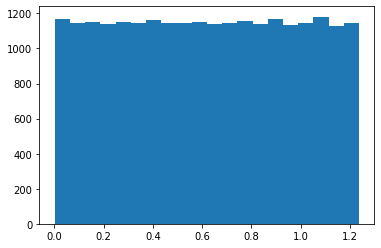

In [43]:
pd.set_option("display.precision", 10)
#we checked, no duplicates so that works :)

dfdf=pd.DataFrame(columns=["Distance"])

dfdf["Distance"]=vals


dfdf=dfdf["Distance"].str.split(" ",expand=True)

dfdf.columns=["OTU1","OTU2","Distance",]




dfdf["Distance"]=dfdf["Distance"].astype(float)

#dataframe_pairs["OTU2"].value_counts()

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.hist(dfdf["Distance"], bins=20)
fig1.savefig(savepath+taxname+"/plots/distplot_"+taxname+"_uniform.png")

df1str=dfdf.to_csv(header=True,sep="\t")
f= open(savepath+taxname+"/" + taxname+"_10k_99_dists.csv","w+")
f.write(df1str)
f.close()


#newest version of Jankos table, 99 OTUs
#f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/samples-otus.dat.97_plusMetaNoHeader_taxonomyFixed_unmapped_zeroAbundFix.h5")
#f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.1/metag_minfilter/samples-otus.99.metag.minfilter.h5")

f2=pd.read_csv(savepath+taxname+"/" + taxname+"_10k_99_dists.csv", sep="\t")

dfdf=f2

a=[]
b=[]
#if we have archaea:
if "Archaea" in taxname:
    #For Eukarytoes
    for i in range(10000):
        a.append(re.sub(r'^.*?_99_', 'A99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'A99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))


    #For Bacteria
    #for i in range(10000):
        #a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))

    dataframe_pairs1=pd.DataFrame(columns=["Pairs"])

    dataframe_pairs1["Pairs"]=a

    #dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

    #TRIAL



    dataframe_pairs1=dataframe_pairs1["Pairs"].str.split(" ", expand=True)
    #


    dataframe_pairs1.columns=["OTU1","OTU2"]

    dataframe_pairs1

    p=[]
    for i in range(10000):
        p.append(re.sub(r'^.*?_99_', 'A99_', dataframe_pairs1["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'A99_', dataframe_pairs1["OTU2"].values[i]))
else:
        #For Eukarytoes
    for i in range(10000):
        a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))


    #For Bacteria
    #for i in range(10000):
        #a.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))
        #b.append(re.sub(r'^.*?_99_', 'B99_', f2["OTU2"].values[i]))

    dataframe_pairs1=pd.DataFrame(columns=["Pairs"])

    dataframe_pairs1["Pairs"]=a

    #dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

    #TRIAL



    dataframe_pairs1=dataframe_pairs1["Pairs"].str.split(" ", expand=True)
    #


    dataframe_pairs1.columns=["OTU1","OTU2"]

    dataframe_pairs1

    p=[]
    for i in range(10000):
        p.append(re.sub(r'^.*?_99_', 'B99_', dataframe_pairs1["OTU1"].values[i]) + " " + re.sub(r'^.*?_99_', 'B99_', dataframe_pairs1["OTU2"].values[i]))

dataframe_pairs=pd.DataFrame(columns=["Pairs"])

dataframe_pairs["Pairs"]=p

#dataframe_pairs=pd.read_csv("pairs_"+taxname+".tbl",header=None)

#TRIAL



dataframe_pairs=dataframe_pairs["Pairs"].str.split(" ", expand=True)
#


dataframe_pairs.columns=["OTU1","OTU2"]

dataframe_pairs

df1str=dataframe_pairs.to_csv(header=False, index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_pairs.tbl","w+")
f.write(df1str)
f.close()

dataframe_pairs=pd.read_csv(savepath+taxname+"/" + taxname+"_pairs.tbl", sep="\t", header=None)

#from collections import Counter
dataframe_pairs.columns=["OTU1","OTU2"]
#Get a file with the taxonomy of our OTUs

tax=f1["meta_data"]["taxonomy"]

tax[tax[2].str.contains(taxname)]

otu_ind=tax[tax[2].str.contains(taxname)].index

#Exclude Chloroplasts here
#l=tax[tax[2].str.contains(taxname)]

#l[l[1].str.contains("E")]

#otu_ind=l[l[1].str.contains("E")].index

#tax.iloc[otu_ind][2].str.split(";",expand=True)

otu_merged=tax.iloc[otu_ind]

taxonomy_df=pd.DataFrame(columns=["OTU"])
taxonomy_df["OTU"]=tax.iloc[otu_ind][0]

tax_df=pd.concat([taxonomy_df,tax.iloc[otu_ind][2].str.split(";",expand=True)],axis=1)

df1str=tax_df.to_csv(header=True, index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_tax.tbl","w+")
f.write(df1str)
f.close()

otus_tax=[]
otus_env=[]
#dataframe_pairs2=dataframe_pairs.iloc[:100]

otutable=f1["otu_data"]["otu_table"]

dataframe_pairs.columns=(["OTU1","OTU2"])

#I think this was the old version

for x in dataframe_pairs["OTU1"]:
    s1=[]
    ind=np.where(f1["otu_data"]["otu_index"]==x)[0][0]
    col1=otutable.getcol(ind)
    zer1=col1.nonzero()[0]
    for i in zer1:
        s1.append(f1["meta_data"]["keywords"].iloc[i,1])    
    otus_env.append(x+ " "+ str(sum('animal' in s for s in s1)) + " "+ str(sum('soil' in s for s in s1)) +" "+ str(sum('plant' in s for s in s1)) + " "+ str(sum('aquatic' in s for s in s1)))

for x in dataframe_pairs["OTU2"]:
    s1=[]
    ind=np.where(f1["otu_data"]["otu_index"]==x)[0][0]
    col1=otutable.getcol(ind)
    zer1=col1.nonzero()[0]
    for i in zer1:
        s1.append(f1["meta_data"]["keywords"].iloc[i,1])    
    otus_env.append(x+ " "+ str(sum('animal' in s for s in s1)) + " "+ str(sum('soil' in s for s in s1)) +" "+ str(sum('plant' in s for s in s1)) + " "+ str(sum('aquatic' in s for s in s1)))

otus_env_df=pd.DataFrame(columns=["split"])
otus_env_df["split"]=otus_env
otus_env_df=otus_env_df["split"].str.split(" ", expand=True)
otus_env_df.columns=["OTU","animal","soil","plant","aquatic"]

otus_env_df

df1str=otus_env_df.to_csv(index=False, sep="\t")
f= open(savepath+taxname+"/" + taxname+"_otus_env.tbl","w+")
f.write(df1str)
f.close()

#/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20210104/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples.csv.gz /mnt/mnemo6/lukas/Python/evo_treedists/Alphaproteobacteria/Alphaproteobacteria_pairs.csv >> /mnt/mnemo6/lukas/Python/evo_treedists/Acido/acidoopairs_99.tbl

#subprocess.Popen([['sh', './vamonos.sh'], close_fds=True)



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#new try, oct 23



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#inp



#subprocess.run(inp, shell=True)
inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl > "+savepath+taxname+"/"+taxname+"_BC.tbl"


inp



subprocess.run(inp, shell=True)

In [ ]:
f= open(savepath+taxname+"/" + taxname+"_otus_env.tbl","w+")
f.write(df1str)
f.close()

#/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20210104/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples.csv.gz /mnt/mnemo6/lukas/Python/evo_treedists/Alphaproteobacteria/Alphaproteobacteria_pairs.csv >> /mnt/mnemo6/lukas/Python/evo_treedists/Acido/acidoopairs_99.tbl

#subprocess.Popen([['sh', './vamonos.sh'], close_fds=True)



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#new try, oct 23



#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


#inp



#subprocess.run(inp, shell=True)
inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl > "+savepath+taxname+"/"+taxname+"_BC.tbl"


inp



subprocess.run(inp, shell=True)

In [ ]:
# without the same project
inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfuncbraycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


inp



subprocess.run(inp, shell=True)

braycurtis_skipproj -makecluststats -projf /mnt/mnemo6/lukas/Python/all_samples_prj_id/all_samples_metaG_prj.tbl

In [16]:
    inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv "+savepath+taxname+"/"+taxname+"_pairs.tbl >> "+savepath+taxname+"/"+taxname+"_BC.tbl"


    inp



    subprocess.run(inp, shell=True)

CompletedProcess(args='/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/community_conservatism/all_samples_otus/samples-otus.90.metag.minfilter.remap_no_euk /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/community_conservatism/taxo_groups/Proteobacteria/Proteobacteria_pairs.tbl >> /mnt/mnemo6/lukas/Python/community_conservatism/taxo_groups/Proteobacteria/Proteobacteria_BC.tbl', returncode=0)

In [ ]:
#if we want to have the version with downsampling, proceed as follows: 
import subprocess
import shlex

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo4/microbeatlas/mapdata/20200307/otutables/samples-otus.90.mapped.gz /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/Chloroflexi/Chloroflexi_BC_2.tbl"

inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/evo_treedists/rarefied_samples/output_90.mapped /mnt/mnemo6/lukas/Python/all_otu_samplelist/downsampled_all_99_otus_samples_min_2_reads_min_20_samples.csv /mnt/mnemo6/lukas/Python/evo_treedists/"+taxname+"/"+taxname+"_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/rarefied_samples/"+taxname+"_BC.tbl"

#inp="/mnt/gaia/jfmrod/gaia/usr/bin/mhpc-clust -t samples -nthreads 30 -dfunc braycurtis -makecluststats /mnt/mnemo6/lukas/Python/evo_treedists/rarefied_samples/output_90.txt /mnt/mnemo6/lukas/Python/all_otu_samplelist/all_99_otus_samples_v0.2.2_.csv /mnt/mnemo6/lukas/Python/evo_treedists/"+taxname+"/"+taxname+"_pairs.tbl >>/mnt/mnemo6/lukas/Python/evo_treedists/rarefied_samples/90_BC.tbl"

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import statsmodels.api as sm # to build a LOWESS model
from scipy import stats
from bokeh.io import export_png

In [6]:
#taxname="Chloroflexi"

In [221]:
#f = pd.read_csv(savepath+taxname+"/"+taxname+"_BC_v2.tbl",skiprows=9, header=None, sep="\t")

In [224]:
f = pd.read_csv(savepath+taxname+"/"+taxname+"_BC.tbl",skiprows=9, header=None, sep="\t")

In [37]:
#f_comm=f[0].str.split("\t",expand=True)

In [222]:
f2 = pd.read_csv(savepath+taxname+"/"+taxname+"_10k_99_dists.csv", sep="\t")

In [39]:
#otus_env_df=pd.read_csv(savepath+taxname+"/"+taxname+"_otus_env.tbl", sep="\t")

In [223]:
tax_df=pd.read_csv(savepath+taxname+"/" + taxname+"_tax.tbl", sep="\t")

In [224]:
f2=f2.iloc[:,1:]

In [42]:
#f_phylo=f2[0].str.split(" ",expand=True)

In [225]:
result = pd.concat([f, f2], axis=1)


result

result.columns= ["short_tax_1", "short_tax_2", "median","5percentile","25percentile","75percentile","95percentile","mean","stddev","nrdist", "phydist","tax_long_1", "tax_long_2"]



result=result.astype({"short_tax_1" :str, "short_tax_2" :str, "median":float,"5percentile":float,"25percentile":float,"75percentile":float,"95percentile":float,"mean":float,"stddev":float,"nrdist":float,"tax_long_1":str, "tax_long_2":str, "phydist":float})

result.dtypes

short_tax_1      object
short_tax_2      object
median          float64
5percentile     float64
25percentile    float64
75percentile    float64
95percentile    float64
mean            float64
stddev          float64
nrdist          float64
phydist         float64
tax_long_1       object
tax_long_2       object
dtype: object

In [226]:
tax_df.index=tax_df["OTU"]
tax_df=tax_df.iloc[:,1:]
tax_df.columns=["Kingdom","Phylum","Class","Order","Family","Genus","Species"]

In [227]:
tax_df

Kingdom         Phylum             Class  \
OTU                                                     
B99_9589    Bacteria  Bacteroidetes  Sphingobacteriia   
B99_161438  Bacteria  Bacteroidetes     Chitinophagia   
B99_89551   Bacteria  Bacteroidetes        Cytophagia   
B99_67487   Bacteria  Bacteroidetes     Chitinophagia   
B99_70893   Bacteria  Bacteroidetes     Chitinophagia   
...              ...            ...               ...   
B99_65116   Bacteria  Bacteroidetes               NaN   
B99_67143   Bacteria  Bacteroidetes               NaN   
B99_46166   Bacteria  Bacteroidetes               NaN   
B99_240875  Bacteria  Bacteroidetes               NaN   
B99_44004   Bacteria  Bacteroidetes     Chitinophagia   

                                             Order               Family  \
OTU                                                                       
B99_9589                        Sphingobacteriales  Sphingobacteriaceae   
B99_161438                         Chitinophagales     Chitinophagaceae   
B99_89551                             Cytophagales                  NaN   
B99_67487                          Chitinophagales     Chitinophagaceae   
B99_70893                          Chitinophagales                  NaN   
...                                            ...                  ...   
B99_65116   Bacteroidetes Order II. Incertae sedis      Rhodothermaceae   
B99_67143   Bacteroidetes Order II. Incertae sedis      Rhodothermaceae   
B99_46166   Bacteroidetes Order II. Incertae sedis      Rhodothermaceae   
B99_240875  Bacteroidetes Order II. Incertae sedis      Rhodothermaceae   
B99_44004                          Chitinophagales     Chitinophagaceae   

                       Genus             Species  
OTU                                               
B99_9589    Mucilaginibacter                 NaN  
B99_161438      Chitinophaga                 NaN  
B99_89551                NaN                 NaN  
B99_67487                NaN                 NaN  
B99_70893                NaN                 NaN  
...                      ...                 ...  
B99_65116       Salinibacter  Salinibacter ruber  
B99_67143       Salinibacter  Salinibacter ruber  
B99_46166       Salinibacter  Salinibacter ruber  
B99_240875      Salinibacter                 NaN  
B99_44004                NaN                 NaN  

[23366 rows x 7 columns]

In [228]:
for row in range(len(result)):
    try:
        if tax_df.loc[result.iloc[row,0],"Species"] == tax_df.loc[result.iloc[row,1],"Species"]:
            result.loc[row, "tax"]=5
        
        elif tax_df.loc[result.iloc[row,0],"Genus"] == tax_df.loc[result.iloc[row,1],"Genus"]:
            result.loc[row, "tax"]=4
        elif tax_df.loc[result.iloc[row,0],"Family"] == tax_df.loc[result.iloc[row,1],"Family"]:
            result.loc[row, "tax"]=3
        elif tax_df.loc[result.iloc[row,0],"Order"] == tax_df.loc[result.iloc[row,1],"Order"]:
            result.loc[row, "tax"]=2
        elif tax_df.loc[result.iloc[row,0],"Class"] == tax_df.loc[result.iloc[row,1],"Class"]:
            result.loc[row, "tax"]=1
    except:
        continue

In [229]:
result["tax"].value_counts()

3.0    1668
2.0    1506
1.0     734
4.0     386
5.0      60
Name: tax, dtype: int64

In [231]:
tax_df["Genus"].value_counts()

Flavobacterium      624
Bacteroides         519
Prevotella          511
Pedobacter          241
Chryseobacterium    231
                   ... 
Flaviramulus          1
Soonwooa              1
Thermophagus          1
Persicobacter         1
Bernardetia           1
Name: Genus, Length: 183, dtype: int64

In [50]:
#remove the otu-pairs where one of them isn't present in any samples anymore after the filtering- total of 150 pairs we lose (is okay or do we need to fix this?)
#result=result[result["nrdist"]>5]

otus_env_df.index=otus_env_df["OTU"]

otus_env_df=otus_env_df.iloc[:,1:]

otus_env_df=otus_env_df.astype(int)

otus_env_df=otus_env_df.drop_duplicates()

otus_env_df.iloc[0].idxmax()

otus_env_df.loc[result.iloc[0,0]].idxmax()

for row in range(len(result)):
    try:
        if otus_env_df.loc[result.iloc[row,0]].idxmax() == otus_env_df.loc[result.iloc[row,1]].idxmax():
            result.loc[row, "env"]=1
        else:
            result.loc[row, "env"]=0
    except:
        continue

result["env"].value_counts()

In [232]:
import datashader as ds, pandas as pd
import datashader.transfer_functions as tf

import matplotlib as mtp
from holoviews import opts
from holoviews.operation.datashader import datashade
import holoviews.operation.datashader as hd
from bokeh.models import Slope
from bokeh.plotting import figure, output_file, show


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
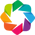

In [233]:
import holoviews as hv

hv.extension('bokeh')

In [234]:
from bokeh.io import export_svgs
p.output_backend = "svg"

In [235]:
correlation_matrix = np.corrcoef(result["phydist"], result["mean"])

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2
correlation_xy

-0.5243250226159528

dfdf=pd.DataFrame(columns=["Distance", "BrayCurtis"])
dfdf["Distance"]=result["mean"]
dfdf["BrayCurtis"]=result["median"]


from bokeh.models import Slope
from bokeh.plotting import figure, output_file, show

#output_file("slope.html", title="slope.py example")

# linear equation parameters
gradient = -0.004911
y_intercept = 0.006873


p = figure(plot_width=600, plot_height=600, x_range=(0,0.05), y_range=(0,0.05))

p.circle(dfdf["Distance"], dfdf["BrayCurtis"], size=2, color="skyblue")

#slope = Slope(gradient=gradient, y_intercept=y_intercept,
              #line_color='orange', line_dash='dashed', line_width=2)

#p.add_layout(slope)

p.yaxis.axis_label = 'Median'
p.xaxis.axis_label = 'Mean'

show(p)


In [236]:
dataframe_pairs

OTU1        OTU2
0      B99_22385  B99_141326
1     B99_178333   B99_30878
2     B99_119410  B99_133983
3     B99_110443   B99_72943
4     B99_232900  B99_182135
...          ...         ...
9995  B99_173870   B99_90507
9996  B99_179986  B99_234603
9997   B99_11130  B99_187198
9998  B99_144842   B99_12612
9999   B99_83223   B99_62957

[10000 rows x 2 columns]

In [305]:
#set the environments variables

In [237]:
ind_tax=tax[tax[2].str.contains(taxname)].index

In [241]:
#go through all bacteroidetes and see the environment prevalence in all
otus_env=[]
for x in ind_tax:
    s1=[]
    #ind=np.where(f1["otu_data"]["otu_index"]==x)[0][0]
    col1=otutable.getcol(x)
    zer1=col1.nonzero()[0]
    for i in zer1:
        s1.append(f1["meta_data"]["keywords"].iloc[i,1])    
    otus_env.append(f1["otu_data"]["otu_index"][x]+ " "+ str(sum('animal' in s for s in s1)) + " "+ str(sum('soil' in s for s in s1)) +" "+ str(sum('plant' in s for s in s1)) + " "+ str(sum('marine' in s for s in s1)+sum('ocean' in s for s in s1)+sum('sea' in s for s in s1))+ " "+ str(sum('freshwater' in s for s in s1)+sum('lake' in s for s in s1)+sum('river' in s for s in s1)))

otus_env_df=pd.DataFrame(columns=["split"])
otus_env_df["split"]=otus_env
otus_env_df=otus_env_df["split"].str.split(" ", expand=True)
otus_env_df.columns=["OTU","animal","soil","plant","marine","freshwater"]

otus_enf_df=otus_env_df.astype({'marine': 'int64','freshwater': 'int64',"animal": "int64", "soil": "int64", "plant": "int64" })

In [242]:
max(otus_enf_df.loc[0][1:])

1532

In [ ]:
#should we normalize bsy the proportions of samples in our database?
#if yes, divide here by the total percentage of samples from each env e.g

In [244]:
#creates a dataframe with the max samplecount of environmental 
otus_enf_df["max_env"]=otus_enf_df.iloc[:,1:].idxmax(axis=1)

In [245]:
otus_enf_df["max_env"].value_counts()

animal        11341
marine         4900
soil           4525
freshwater     1583
plant           946
Name: max_env, dtype: int64

In [246]:
#set the index of the df to the taxid

otus_enf_df.index=otus_enf_df["OTU"]

In [256]:
#load baselines
baselines=pd.read_csv(savepath+"all_baselines.tbl",sep="\t",header=None)

baselines.columns= ["short_tax_1", "short_tax_2", "median","5percentile","25percentile","75percentile","95percentile","mean","stddev","nrdist"]



baselines=baselines.astype({"short_tax_1" :str, "short_tax_2" :str, "median":float,"5percentile":float,"25percentile":float,"75percentile":float,"95percentile":float,"mean":float,"stddev":float,"nrdist":float})


In [257]:
result["baseline_val"]=""

In [258]:
#lets create an idea aboit the cpombinations of taxa we have to create a proper baseline

for x in tqdm(range(len(result))):
    tax1=result.iloc[x,0]
    tax2=result.iloc[x,1]
    
    env1=otus_enf_df.loc[tax1,"max_env"]+"1"
    env2=otus_enf_df.loc[tax2,"max_env"]+"1"
    if env1==env2:
        env2=otus_enf_df.loc[tax2,"max_env"]+"2"
    bl_p1=baselines[baselines["short_tax_1"]==env1]
    bl_p2=bl_p1[bl_p1["short_tax_2"]==env2]
    if len(bl_p2)!=1:
        bl_p1=baselines[baselines["short_tax_2"]==env1]
        bl_p2=bl_p1[bl_p1["short_tax_1"]==env2]
    result.iloc[x,-1]=bl_p2["mean"].values[0]

  2%|▏         | 210/10000 [00:00<00:14, 685.09it/s]


KeyError: 'B99_126931'

In [259]:
#the integrated average baselines value based on he env of the compared otus
result["baseline_val"].mean()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [260]:
baselines

short_tax_1  short_tax_2    median  5percentile  25percentile  \
0       animal1      animal2  0.013482          0.0      0.001651   
1       animal1      marine1  0.000203          0.0      0.000000   
2       animal1  freshwater1  0.001009          0.0      0.000082   
3       animal1     general1  0.004156          0.0      0.000300   
4       animal1        soil1  0.000951          0.0      0.000034   
5       animal1       plant1  0.001204          0.0      0.000043   
6       marine1      marine2  0.010135          0.0      0.000724   
7       marine1  freshwater1  0.004939          0.0      0.000383   
8       marine1     general1  0.000593          0.0      0.000000   
9       marine1        soil1  0.003223          0.0      0.000095   
10      marine1       plant1  0.002066          0.0      0.000017   
11  freshwater1  freshwater2  0.012910          0.0      0.001343   
12  freshwater1     general1  0.002091          0.0      0.000139   
13  freshwater1        soil1  0.011871          0.0      0.000515   
14  freshwater1       plant1  0.007827          0.0      0.000227   
15     general1     general2  0.002925          0.0      0.000151   
16     general1        soil1  0.002052          0.0      0.000059   
17     general1       plant1  0.002104          0.0      0.000049   
18        soil1        soil2  0.019769          0.0      0.000182   
19        soil1       plant1  0.011090          0.0      0.000065   
20       plant1       plant2  0.007277          0.0      0.000024   

    75percentile  95percentile      mean    stddev        nrdist  
0       0.061972      0.174715  0.042934  0.063454  2.500000e+09  
1       0.001513      0.014185  0.003041  0.011641  2.000000e+09  
2       0.005492      0.043501  0.008260  0.021825  2.000000e+09  
3       0.029420      0.138825  0.027846  0.053033  2.500000e+09  
4       0.006117      0.045858  0.008698  0.022673  2.500000e+09  
5       0.008396      0.066405  0.012277  0.031219  2.500000e+09  
6       0.037210      0.136036  0.030803  0.051313  1.600000e+09  
7       0.016467      0.056017  0.013795  0.025113  1.600000e+09  
8       0.005201      0.035997  0.007437  0.021476  2.000000e+09  
9       0.011619      0.037759  0.009469  0.017823  2.000000e+09  
10      0.009862      0.036023  0.008474  0.017443  2.000000e+09  
11      0.048731      0.148540  0.035664  0.052767  1.600000e+09  
12      0.014180      0.072554  0.014622  0.030175  2.000000e+09  
13      0.042646      0.108742  0.028778  0.040794  2.000000e+09  
14      0.037784      0.100162  0.025307  0.037802  2.000000e+09  
15      0.020067      0.119118  0.022618  0.047597  2.500000e+09  
16      0.015947      0.114505  0.020554  0.046208  2.500000e+09  
17      0.016853      0.110031  0.020373  0.044783  2.500000e+09  
18      0.093776      0.237277  0.059533  0.080872  2.500000e+09  
19      0.070023      0.211245  0.048146  0.072434  2.500000e+09  
20      0.060327      0.195444  0.043008  0.069002  2.500000e+09

#probably dont need this
jank=pd.read_csv("/mnt/mnemo6/lukas/Python/habitat_OTUs_janko/habitat_stats_abundweighted_otu99_sgroup5_detailed.tsv", sep="\t")
j=jank[jank["abund_type"]=="rel_abund"]

tax=f1["meta_data"]["taxonomy"]

veru=tax[tax[2].str.contains(taxname)]

verucos=j[j["oid"].isin(veru[0])]
#This table (jankos) only contains otus found in at least 5 sample groups, so we may loose some OTUs here

veru_max_env=verucos.sort_values('abund', ascending=False).drop_duplicates("oid").sort_index()

veru_max_env["env"].value_counts()



veru_max_env.index=veru_max_env["oid"]

In [41]:
"""for row in range(len(result)):
    try:
        if veru_max_env.loc[result.iloc[row,0],"env"] == "aquatic":
            result.loc[row, "env"]=1
        
        elif veru_max_env.loc[result.iloc[row,1],"env"] == "aquatic":
            result.loc[row, "env"]=1
        else:
            result.loc[row, "env"]=0
    except:
        continue
"""

In [42]:
"""for row in range(len(result)):
    try:
        if veru_max_env.loc[result.iloc[row,0],"env"] == "aquatic" and veru_max_env.loc[result.iloc[row,1],"env"] == "aquatic":
            result.loc[row, "env"]=1
    
        else:
            result.loc[row, "env"]=0
    except:
        continue
        
"""

In [239]:
for row in range(len(result)):
    try:
        if veru_max_env.loc[result.iloc[row,0],"env"] == veru_max_env.loc[result.iloc[row,1],"env"]:
            result.loc[row, "env"]=1
    
        else:
            result.loc[row, "env"]=0
    except:
        continue

In [262]:
#Create dictionary of all samples an otu is found in


samples_per_otu=[]
dici={}

df1=pd.DataFrame(columns=["OTU"])
for q in ind_tax:
    col1=otutable.getcol(q)
    n1=f1["otu_data"]["otu_index"][q]
    zer1=(col1).nonzero()[0]
   
    #s1.append(">"+n1)
    for i in zer1:
        
        samples_per_otu.append(f1["otu_data"]["sample_index"][i])
    dici[">"+n1]=samples_per_otu
    samples_per_otu=[]
    #s1.append("\n")
        
        
#df1["OTU"]=s1

In [263]:
#Now that we have a dictionary with all the OTUs in questions plus the respective samples where they' re found, 
#we can calculate the percentage of shared samples. For this, we look up the amount of shared samples with intersec and then
#divide that by the total amount of samples - the shared samples, to get the percentage.

shared_samples=[]
for l in range(10000):
    t1=">"+dataframe_pairs.iloc[l,0]
    t2=">"+dataframe_pairs.iloc[l,1]
    intersec=list(set(dici[t1]) & set(dici[t2]))
    shared_samples.append(len(intersec)/(len(dici[t1])+len(dici[t2])-len(intersec)))
    
result["shared_samples"]=shared_samples



KeyError: '>B99_126931'

In [ ]:
#Here we will be adding the sequence alignment toi get sequence identity

In [264]:
dataframe_pairs

OTU1        OTU2
0      B99_22385  B99_141326
1     B99_178333   B99_30878
2     B99_119410  B99_133983
3     B99_110443   B99_72943
4     B99_232900  B99_182135
...          ...         ...
9995  B99_173870   B99_90507
9996  B99_179986  B99_234603
9997   B99_11130  B99_187198
9998  B99_144842   B99_12612
9999   B99_83223   B99_62957

[10000 rows x 2 columns]

In [38]:
#


pairs_sorted=[]
for x in range(len(dataframe_pairs)):
    pairs_sorted.append(dataframe_pairs.loc[x,"OTU1"])
    pairs_sorted.append(dataframe_pairs.loc[x,"OTU2"])

In [39]:
tax=f1["meta_data"]["taxonomy"]

In [40]:
taxf=tax[tax[2].str.contains(taxname)]

In [41]:
pairs_sorted_long=[]
for otu in pairs_sorted:
    long=taxf[taxf[0]==otu][1]
    pairs_sorted_long.append(long.values[0])

In [42]:
len(pairs_sorted_long)

20000

In [43]:
allseqs=pd.read_csv("/mnt/mnemo4/microbeatlas/mapdata/20200307/otus/99/otus.allinfo",sep="\t")

In [44]:
#set the index to the otu identifier
allseqs.index=allseqs["OTU"]

In [45]:
#gets the sequence of the pairs
fasta_file=""
for p in pairs_sorted_long:
    header=p
    sequ=allseqs.loc[p,"RepSequenceID"]
    fasta_file+=">"+header+"\n"
    fasta_file+=sequ+"\n"

In [46]:
fas=open(savepath+taxname+"/"+taxname+"_sequences_sorted.fasta","w")
fas.write(fasta_file)
fas.close()

In [75]:
#open the standart file and replace with actual filepath

stand=open(savepath+"sequence_identity_global_file.txt")
standl=stand.readlines()
stand.close()


standl[2]='result=load_seqs("'+savepath+taxname+'/'+taxname+'_sequences_sorted.fasta");\n'


In [77]:
#save it as th actual script to run
speci=open(savepath+taxname+"/"+taxname+"_seqid_script.txt","w+")
speci.write("".join(standl))
speci.close()

In [ ]:
#seq_extraction=pd.read_csv("/mnt/mnemo6/lukas/Python/evo_treedists/seq_alignment_joao/Bacteroidetes_sequences.tsv",sep="\t",header=None)

fasta_file=""
for j in range(len(seq_extraction)):
    header=seq_extraction.iloc[j,0]
    sequ=seq_extraction.iloc[j,5]
    fasta_file+=">"+header+"\n"
    fasta_file+=sequ+"\n"

In [79]:
# run the script: 
inp_seqali="~jfmrod/deimos/usr/bin/esh "+savepath+taxname+"/"+taxname+"_seqid_script.txt >> "+savepath+taxname+"/"+taxname+"_sequence_identity.tsv"

In [48]:
inp_seqali

'~jfmrod/deimos/usr/bin/esh /mnt/mnemo6/lukas/Python/evo_treedists/seq_alignment_joao/script_test.txt >> /mnt/mnemo6/lukas/Python/community_conservatism/taxo_groups/Bacteroidetes/Bacteroidetes_sequence_identity.tsv'

In [80]:
subprocess.run(inp_seqali,shell=True)

CompletedProcess(args='~jfmrod/deimos/usr/bin/esh /mnt/mnemo6/lukas/Python/community_conservatism/taxo_groups/Bacteroidetes/Bacteroidetes_seqid_script.txt >> /mnt/mnemo6/lukas/Python/community_conservatism/taxo_groups/Bacteroidetes/Bacteroidetes_sequence_identity.tsv', returncode=0)

In [81]:
seqid=pd.read_csv(savepath+taxname+"/"+taxname+"_sequence_identity.tsv",sep="\t",header=None)

In [82]:
result=pd.read_csv(savepath+taxname+"/"+taxname+"_result.csv",sep="\t")

In [83]:
result["seqid"]=seqid.iloc[:,0]

In [84]:
df1str=result.to_csv(index=False, sep="\t")
f= open(savepath+taxname+"/"+taxname+"_result_w_seqid.csv","w+")
f.write(df1str)
f.close()

In [302]:
baselines=pd.read_csv(savepath+"all_baselines.tbl",sep="\t",header=None)

baselines.columns= ["short_tax_1", "short_tax_2", "median","5percentile","25percentile","75percentile","95percentile","mean","stddev","nrdist"]



baselines=baselines.astype({"short_tax_1" :str, "short_tax_2" :str, "median":float,"5percentile":float,"25percentile":float,"75percentile":float,"95percentile":float,"mean":float,"stddev":float,"nrdist":float})


In [303]:
baselines

short_tax_1  short_tax_2       median  5percentile  25percentile  \
0       animal1      animal2  0.013481500          0.0  0.0016513100   
1       animal1      marine1  0.000202624          0.0  0.0000000000   
2       animal1  freshwater1  0.001009080          0.0  0.0000815474   
3       animal1     general1  0.004155900          0.0  0.0002997260   
4       animal1        soil1  0.000950802          0.0  0.0000335790   
5       animal1       plant1  0.001204250          0.0  0.0000430719   
6       marine1      marine2  0.010135400          0.0  0.0007240840   
7       marine1  freshwater1  0.004938740          0.0  0.0003830320   
8       marine1     general1  0.000592668          0.0  0.0000000000   
9       marine1        soil1  0.003222800          0.0  0.0000948354   
10      marine1       plant1  0.002065930          0.0  0.0000168432   
11  freshwater1  freshwater2  0.012910200          0.0  0.0013434800   
12  freshwater1     general1  0.002090730          0.0  0.0001386840   
13  freshwater1        soil1  0.011871000          0.0  0.0005152050   
14  freshwater1       plant1  0.007827190          0.0  0.0002266550   
15     general1     general2  0.002924630          0.0  0.0001511260   
16     general1        soil1  0.002051580          0.0  0.0000588616   
17     general1       plant1  0.002103960          0.0  0.0000487572   
18        soil1        soil2  0.019769200          0.0  0.0001820690   
19        soil1       plant1  0.011090500          0.0  0.0000652955   
20       plant1       plant2  0.007277400          0.0  0.0000237784   

    75percentile  95percentile        mean     stddev        nrdist  
0     0.06197210     0.1747150  0.04293440  0.0634536  2500000000.0  
1     0.00151259     0.0141848  0.00304126  0.0116414  2000000000.0  
2     0.00549171     0.0435008  0.00825969  0.0218251  2000000000.0  
3     0.02942050     0.1388250  0.02784560  0.0530333  2500000000.0  
4     0.00611659     0.0458582  0.00869752  0.0226728  2500000000.0  
5     0.00839623     0.0664055  0.01227720  0.0312194  2500000000.0  
6     0.03721030     0.1360360  0.03080310  0.0513128  1600000000.0  
7     0.01646690     0.0560171  0.01379510  0.0251127  1600000000.0  
8     0.00520112     0.0359971  0.00743665  0.0214761  2000000000.0  
9     0.01161920     0.0377585  0.00946923  0.0178230  2000000000.0  
10    0.00986229     0.0360233  0.00847420  0.0174427  2000000000.0  
11    0.04873050     0.1485400  0.03566410  0.0527675  1600000000.0  
12    0.01417990     0.0725537  0.01462200  0.0301752  2000000000.0  
13    0.04264630     0.1087420  0.02877830  0.0407941  2000000000.0  
14    0.03778400     0.1001620  0.02530690  0.0378021  2000000000.0  
15    0.02006740     0.1191180  0.02261850  0.0475966  2500000000.0  
16    0.01594700     0.1145050  0.02055450  0.0462084  2500000000.0  
17    0.01685280     0.1100310  0.02037320  0.0447835  2500000000.0  
18    0.09377580     0.2372770  0.05953270  0.0808718  2500000000.0  
19    0.07002280     0.2112450  0.04814600  0.0724338  2500000000.0  
20    0.06032750     0.1954440  0.04300830  0.0690025  2500000000.0

In [265]:
from bokeh.io import export_svgs

In [ ]:
#here: lets create a baseline for each phylum
#by taking into account the max env of each otu against each otu!

In [266]:
result

short_tax_1 short_tax_2    median  5percentile  25percentile  \
0      B99_22385  B99_141326  0.034195     0.008416      0.017523   
1     B99_178333   B99_30878  0.042450     0.005709      0.018760   
2     B99_119410  B99_133983  0.035396     0.002090      0.014707   
3     B99_110443   B99_72943  0.015108     0.002066      0.008760   
4     B99_232900  B99_182135  0.072649     0.003575      0.017073   
...          ...         ...       ...          ...           ...   
9995  B99_173870   B99_90507  0.002898     0.000118      0.001026   
9996  B99_179986  B99_234603  0.000765     0.000001      0.000247   
9997   B99_11130  B99_187198  0.041368     0.005726      0.023646   
9998  B99_144842   B99_12612  0.010521     0.000150      0.001464   
9999   B99_83223   B99_62957  0.041029     0.011331      0.024921   

      75percentile  95percentile      mean    stddev      nrdist   phydist  \
0         0.101377      0.137567  0.060038  0.046794      2336.0  0.608513   
1         0.074871      0.153645  0.054717  0.046682    142215.0  0.800345   
2         0.061609      0.117680  0.044134  0.037295      5859.0  0.245590   
3         0.026847      0.056432  0.022074  0.026064      2109.0  0.609329   
4         0.101132      0.147320  0.068162  0.050392    279350.0  1.155335   
...            ...           ...       ...       ...         ...       ...   
9995      0.005356      0.012897  0.004974  0.010741    286538.0  1.077855   
9996      0.001630      0.007036  0.001655  0.003736     81857.0  1.224426   
9997      0.067420      0.134753  0.051399  0.039845    199230.0  0.865562   
9998      0.098529      0.229539  0.058218  0.079924  67003544.0  1.151578   
9999      0.068695      0.134038  0.052017  0.038172      2156.0  0.414037   

                                             tax_long_1  \
0         B16S_90_613_96_2428_97_2905_98_17042_99_22385   
1     B16S_90_338_96_12090_97_14502_98_122118_99_178333   
2        B16S_90_170_96_1885_97_2247_98_83948_99_119410   
3     B16S_90_2587_96_13572_97_16339_98_20045_99_110443   
4     B16S_90_32_96_32311_97_117617_98_157044_99_232900   
...                                                 ...   
9995       B16S_90_62_96_3824_97_4643_98_5859_99_173870   
9996  B16S_90_25885_96_71307_97_93164_98_123127_99_1...   
9997       B16S_90_251_96_5503_97_6633_98_8274_99_11130   
9998    B16S_90_27_96_1109_97_76859_98_100634_99_144842   
9999       B16S_90_376_96_2600_97_3128_98_6490_99_83223   

                                             tax_long_2  tax baseline_val  
0      B16S_90_27783_96_7200_97_8620_98_10586_99_141326  NaN    0.0287783  
1       B16S_90_312_96_15709_97_18998_98_23412_99_30878  NaN   0.00869752  
2      B16S_90_170_96_56607_97_71510_98_93433_99_133983  3.0    0.0084742  
3         B16S_90_989_96_2764_97_3337_98_52790_99_72943  2.0   0.00946923  
4     B16S_90_2834_96_7739_97_94186_98_124516_99_182135  1.0    0.0429344  
...                                                 ...  ...          ...  
9995   B16S_90_4944_96_40167_97_50262_98_64747_99_90507  1.0               
9996  B16S_90_610_96_53179_97_66972_98_158113_99_234603  NaN               
9997   B16S_90_32_96_32311_97_40163_98_127756_99_187198  NaN               
9998     B16S_90_26565_96_6373_97_7652_98_9459_99_12612  NaN               
9999       B16S_90_170_96_1688_97_2003_98_2436_99_62957  3.0               

[10000 rows x 15 columns]

In [ ]:
#mantel test or some statistics here

In [135]:
dists1 = [0.2, 0.4, 0.3, 0.6, 0.9, 0.4] # E.g. genetic distances
dists2 = [0.3, 0.3, 0.2, 0.7, 0.8, 0.3] # E.g. geographical distances

In [197]:
z= np.random.random(351)
zz = np.random.random(351)


In [205]:
z = [0.0600617, 0.054749 , 0.0445405, 0.0220931, 0.0683196, 0.0288873,
       0.129441 , 0.0820841, 0.0473999, 0.0914683] # E.g. genetic distances
zz = [0.60851318, 0.80034471, 0.2455903 , 0.60932893, 1.15533531,
       1.11387646, 0.15473107, 0.23795378, 0.88881218, 1.05709124] # E.g. geographical distances

In [142]:
result["mean"][:10].values

array([0.0600617, 0.054749 , 0.0445405, 0.0220931, 0.0683196, 0.0288873,
       0.129441 , 0.0820841, 0.0473999, 0.0914683])

In [200]:
result["phydist"][:15].values

array([0.60851318, 0.80034471, 0.2455903 , 0.60932893, 1.15533531,
       1.11387646, 0.15473107, 0.23795378, 0.88881218, 1.05709124,
       0.86744875, 1.09454489, 0.52892309, 0.12527597, 1.24551868])

In [146]:
#oct 23: add mantel test here? :
from scipy.spatial.distance import pdist, squareform

In [138]:
mantel.test(np.array(dists1), np.array(result["mean"]) ,perms=1000, method='pearson', tail='upper')

ValueError: Y is not a valid condensed or redundant distance matrix

In [206]:
mantel.test(z, zz ,perms=10, method='pearson', tail='upper')

MantelResult(-0.35120338178647487, 0.9, -0.6778318615657248)

In [131]:
np.array(result["phydist"])

array([0.60851318, 0.80034471, 0.2455903 , ..., 0.86556154, 1.15157807,
       0.41403729])

In [202]:
mantel.test(z, zz )

ValueError: X is not a valid condensed or redundant distance matrix

In [162]:
result["mean"]

0       0.060062
1       0.054749
2       0.044540
3       0.022093
4       0.068320
          ...   
9995    0.004985
9996    0.001703
9997    0.051432
9998    0.058305
9999    0.052061
Name: mean, Length: 10000, dtype: float64

In [193]:
z=[]
for x in result["phydist"][:11].values:
    z.append(x)

In [194]:
zz=[]
for x in result["mean"][:11].values:
    zz.append(x)

In [188]:
dists1

[0.0600617,
 0.054749,
 0.0445405,
 0.0220931,
 0.0683196,
 0.0288873,
 0.129441,
 0.0820841,
 0.0473999,
 0.0914683]

In [158]:
z

[0.6085131764411926,
 0.800344705581665,
 0.24559029936790466,
 0.6093289256095886,
 1.1553353071212769,
 1.113876461982727,
 0.15473106503486633,
 0.237953782081604,
 0.8888121843338013,
 1.0570912361145022]

In [267]:
#For Environment difference

dfdf=pd.DataFrame(columns=["Distance", "BrayCurtis"])
dfdf["Distance"]=result["phydist"]
dfdf["BrayCurtis"]=result["mean"]
dfdf["env"]=result["env"]
dfdf




z = np.polyfit(dfdf["Distance"], dfdf["BrayCurtis"], 1)
u = np.poly1d(z)
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))


#output_file("slope.html", title="slope.py example")

# linear equation parameters
gradient = u[1]
y_intercept = u[0]


p = figure(plot_width=600, plot_height=600, x_range=(0,dfdf["Distance"].max()), y_range=(0,dfdf["BrayCurtis"].max()))
dfdf_1=dfdf[dfdf["env"]==1]
dfdf_2=dfdf[dfdf["env"]==0]
dfdf_3=dfdf[dfdf["env"].isnull()]

p.circle(dfdf_1["Distance"], dfdf_1["BrayCurtis"], size=0.5, color="green")
p.circle(dfdf_2["Distance"], dfdf_2["BrayCurtis"], size=0.5, color="red")
p.circle(dfdf_3["Distance"], dfdf_2["BrayCurtis"], size=0.5, color="orange")

#slope = Slope(gradient=gradient, y_intercept=y_intercept,
#              line_color='orange', line_dash='dashed', line_width=1.5)

x=dfdf["Distance"]
y=dfdf["BrayCurtis"]


#p.add_layout(slope)
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

popt, _ = curve_fit(objective, x, y)
a, b, c, d, e, f = popt

print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
x_line = np.linspace(min(x), max(x),num=500)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
#p.add_layout(x_line, y_line, '--',color='red')
#p.add_layout(slope)

###Polynomial Fit:

#p.circle(x_line, y_line, color="blue", size=0.5)
#p.add_layout(slope)


###LOWESS Fit:

lowess = sm.nonparametric.lowess

#y_hat1 = lowess(y, x)

#Fit the data to lowess model. Frac is indicating how sharp the curvwe changes, the smaller the value (standard: 2/3), the fast the change. 

y_hat2 = lowess(y, x, frac=1/5)


p.circle(y_hat2[:,0], y_hat2[:,1], color="blue", size=0.5)

#add baseline similarity
x2=np.linspace(0, max(x), num=200).tolist()
y2=200*[baselines.loc[2,"mean"]]

p.circle(x2, y2, color="red", size=0.5)



p.yaxis.axis_label = 'BrayCurtis Similarity (Mean)'
p.xaxis.axis_label = 'Phylogenetic Distance'

#show(p)
p.output_backend = "svg"
export_svgs(p,filename=savepath+taxname+"/plots/"+taxname+"_env_v2.svg")
#export_png(p,filename=savepath+taxname+"/plots/"+taxname+"_env.png")


KeyError: 'env'

In [99]:
#For Environment difference

dfdf=pd.DataFrame(columns=["Distance", "BrayCurtis"])
dfdf["Distance"]=result["seqid"]
dfdf["BrayCurtis"]=result["mean"]
dfdf["env"]=result["env"]
dfdf

z = np.polyfit(dfdf["Distance"], dfdf["BrayCurtis"], 1)
u = np.poly1d(z)
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

from bokeh.models import Slope
from bokeh.plotting import figure, output_file, show

#output_file("slope.html", title="slope.py example")

# linear equation parameters
gradient = u[1]
y_intercept = u[0]


p = figure(plot_width=600, plot_height=600, x_range=(0,dfdf["Distance"].max()), y_range=(0,dfdf["BrayCurtis"].max()))
dfdf_1=dfdf[dfdf["env"]==1]
dfdf_2=dfdf[dfdf["env"]==0]
dfdf_3=dfdf[dfdf["env"].isnull()]

p.circle(dfdf_1["Distance"], dfdf_1["BrayCurtis"], size=0.5, color="green")
p.circle(dfdf_2["Distance"], dfdf_2["BrayCurtis"], size=0.5, color="red")
p.circle(dfdf_3["Distance"], dfdf_2["BrayCurtis"], size=0.5, color="orange")

#slope = Slope(gradient=gradient, y_intercept=y_intercept,
#              line_color='orange', line_dash='dashed', line_width=1.5)

x=dfdf["Distance"]
y=dfdf["BrayCurtis"]


#p.add_layout(slope)
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

popt, _ = curve_fit(objective, x, y)
a, b, c, d, e, f = popt

print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
x_line = np.linspace(min(x), max(x),num=500)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
#p.add_layout(x_line, y_line, '--',color='red')
#p.add_layout(slope)

###Polynomial Fit:

#p.circle(x_line, y_line, color="blue", size=0.5)
#p.add_layout(slope)


###LOWESS Fit:

lowess = sm.nonparametric.lowess

#y_hat1 = lowess(y, x)

#Fit the data to lowess model. Frac is indicating how sharp the curvwe changes, the smaller the value (standard: 2/3), the fast the change. 

y_hat2 = lowess(y, x, frac=1/5)


p.circle(y_hat2[:,0], y_hat2[:,1], color="blue", size=0.5)

#add baseline similarity
x2=np.linspace(0, max(x), num=200).tolist()
y2=200*[baselines.loc[2,"mean"]]

p.circle(x2, y2, color="red", size=0.5)



p.yaxis.axis_label = 'BrayCurtis Similarity (Mean)'
p.xaxis.axis_label = 'Phylogenetic Distance'

#show(p)
#export_png(p,filename=savepath+taxname+"/plots/"+taxname+"_env_seqid.png")
p.output_backend = "svg"
export_svgs(p,filename=savepath+taxname+"/plots/"+taxname+"_env_seqid.svg")

y=0.314963x+(-0.195454)
y = -36.28754 * x + 115.66348 * x^2 + -182.24819


InvalidSessionIdException: Message: Tried to run command without establishing a connection


In [269]:
imp_col=result.columns[2:10]

In [272]:
#For Taxonomy difference
for h in imp_col:
    dfdf=pd.DataFrame(columns=["Distance", "BrayCurtis"])
    dfdf["Distance"]=result["phydist"]
    dfdf["BrayCurtis"]=result[h]
    dfdf["tax"]=result["tax"]
    dfdf

    z = np.polyfit(dfdf["Distance"], dfdf["BrayCurtis"], 1)
    u = np.poly1d(z)
    print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

    from bokeh.models import Slope
    from bokeh.plotting import figure, output_file, show

    #output_file("slope.html", title="slope.py example")

    # linear equation parameters
    gradient = u[1]
    y_intercept = u[0]


    p = figure(plot_width=600, plot_height=600, x_range=(0,dfdf["Distance"].max()), y_range=(0,dfdf["BrayCurtis"].max()))


    dfdf_5=dfdf[dfdf["tax"]==5]
    dfdf_4=dfdf[dfdf["tax"]==4]
    dfdf_3=dfdf[dfdf["tax"]==3]
    dfdf_2=dfdf[dfdf["tax"]==2]
    dfdf_1=dfdf[dfdf["tax"]==1]
    dfdf_0=dfdf[dfdf["tax"].isnull()]


    p.circle(dfdf_5["Distance"], dfdf_5["BrayCurtis"], size=1, color="purple")
    p.circle(dfdf_4["Distance"], dfdf_4["BrayCurtis"], size=1, color="green")
    p.circle(dfdf_3["Distance"], dfdf_3["BrayCurtis"], size=1, color="red")
    p.circle(dfdf_2["Distance"], dfdf_2["BrayCurtis"], size=1, color="orange")
    p.circle(dfdf_1["Distance"], dfdf_1["BrayCurtis"], size=1, color="black")
    p.circle(dfdf_0["Distance"], dfdf_0["BrayCurtis"], size=1, color="grey")

    slope = Slope(gradient=gradient, y_intercept=y_intercept,
                  line_color='orange', line_dash='dashed', line_width=1.5)

    #p.add_layout(slope)
    x=dfdf["Distance"]
    y=dfdf["BrayCurtis"]


    def objective(x, a, b, c, d, e, f):
        return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

    popt, _ = curve_fit(objective, x, y)
    a, b, c, d, e, f = popt

    print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
    x_line = np.linspace(min(x), max(x),num=500)
    # calculate the output for the range
    y_line = objective(x_line, a, b, c, d, e, f)
    # create a line plot for the mapping function
    #p.add_layout(x_line, y_line, '--',color='red')
    #p.add_layout(slope)
    ###LOWESS Fit:

    lowess = sm.nonparametric.lowess

    #y_hat1 = lowess(y, x)

    #Fit the data to lowess model. Frac is indicating how sharp the curvwe changes, the smaller the value (standard: 2/3), the fast the change. 

    y_hat2 = lowess(y, x, frac=1/5)


    p.circle(y_hat2[:,0], y_hat2[:,1], color="blue", size=0.5)

    #add baseline similarity
    x2=np.linspace(0, max(x), num=200).tolist()
    y2=200*[baselines.loc[2,str(h)]]



    p.circle(x2, y2, color="red", size=0.5)

    p.yaxis.axis_label = "BrayCurtis Similarity ("+str(h)+")"
    p.xaxis.axis_label = 'Phylogenetic Distance'

    show(p)
    p.output_backend = "svg"
    #export_svgs(p, filename=savepath+taxname+"/plots/"+taxname+"_tax_"+str(h)+"_v2.svg")
    #export_png(p, filename=savepath+taxname+"/plots/"+taxname+"_tax_"+str(h)+".png")

y=-0.059680x+(0.080139)
y = -0.08836 * x + -0.66749 * x^2 + 1.65906


y=-0.011702x+(0.014815)
y = -0.03587 * x + -0.08026 * x^2 + 0.25859


y=-0.035384x+(0.045872)
y = -0.06803 * x + -0.36756 * x^2 + 0.96064


y=-0.087761x+(0.124889)
y = -0.09503 * x + -1.01976 * x^2 + 2.43096


y=-0.127107x+(0.208561)
y = -0.10606 * x + -1.45087 * x^2 + 3.37221


y=-0.063187x+(0.091701)
y = -0.08151 * x + -0.70446 * x^2 + 1.71760


y=-0.033752x+(0.062656)
y = -0.03828 * x + -0.36293 * x^2 + 0.87305


y=-2498177.605879x+(5916329.700947)
y = 31686585.68999 * x + -231095255.47531 * x^2 + 477495621.69863
